In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt


/Users/juan/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
#Cargamos los datos
df = pd.read_csv('/Users/juan/Library/CloudStorage/GoogleDrive-juan.sanz@asociacionbigdata.com/Unidades compartidas/Máster UMH/II TÉCNICAS ESTADÍSTICAS PARA EL APRENDIZAJE/practicas/Practica final RRNN/pricerunner_aggregate.csv')
print("Forma del conjunto de datos original:", df.shape)
df

Forma del conjunto de datos original: (35311, 7)


,Product ID,Product Title,Merchant ID,Cluster ID,Cluster Label,Category ID,Category Label;
0,1,apple iphone 8 plus 64gb silver,1.0,1.0,Apple iPhone 8 Plus 64GB,2612.0,Mobile Phones;
1,2,apple iphone 8 plus 64 gb spacegrau,2.0,1.0,Apple iPhone 8 Plus 64GB,2612.0,Mobile Phones;
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3.0,1.0,Apple iPhone 8 Plus 64GB,2612.0,Mobile Phones;
3,4,apple iphone 8 plus 64gb space grey,4.0,1.0,Apple iPhone 8 Plus 64GB,2612.0,Mobile Phones;
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5.0,1.0,Apple iPhone 8 Plus 64GB,2612.0,Mobile Phones;
...,...,...,...,...,...,...,...
35306,47350,smeg fab28 60cm retro style right hand hinge f...,59.0,47517.0,Smeg FAB28 Cream,2623.0,Fridges;
35307,47351,smeg fab28 60cm retro style left hand hinge fr...,59.0,47518.0,Smeg FAB28 Red,2623.0,Fridges;
35308,47352,smeg fab28 60cm retro style left hand hinge fr...,59.0,47519.0,Smeg FAB28 Pink,2623.0,Fridges;
35309,47355,candy 60cm built under larder fridge cru160nek,125.0,47524.0,Candy CRU16.0,2623.0,Fridges;


In [3]:
# Limpiamos los nombres de las columnas
df.columns = df.columns.str.strip()

# Eliminamos duplicados basándonos en 'Product ID' y 'Merchant ID'
df = df.drop_duplicates(subset=['Product ID', 'Merchant ID'])
print("Forma del conjunto de datos sin duplicados:", df.shape)

# Preprocesamiento

# 1. Eliminamos columnas irrelevantes
df = df.drop(['Product ID', 'Merchant ID', 'Cluster ID', 'Category ID', "Product Title"], axis=1)

#cambiar el nombre de la columna "Category Label;" a "Category Label"
df.rename(columns = {'Category Label;':'Category Label'}, inplace = True)


Forma del conjunto de datos sin duplicados: (35311, 7)


In [4]:
df

,Cluster Label,Category Label
0,Apple iPhone 8 Plus 64GB,Mobile Phones;
1,Apple iPhone 8 Plus 64GB,Mobile Phones;
2,Apple iPhone 8 Plus 64GB,Mobile Phones;
3,Apple iPhone 8 Plus 64GB,Mobile Phones;
4,Apple iPhone 8 Plus 64GB,Mobile Phones;
...,...,...
35306,Smeg FAB28 Cream,Fridges;
35307,Smeg FAB28 Red,Fridges;
35308,Smeg FAB28 Pink,Fridges;
35309,Candy CRU16.0,Fridges;


In [5]:
# 2. Codificamos las variables categóricas , 'Cluster Label', 'Category Label'
le_cluster = LabelEncoder()
le_category = LabelEncoder()
df['Cluster Label'] = le_cluster.fit_transform(df['Cluster Label'])
df['Category Label'] = le_category.fit_transform(df['Category Label'])

In [6]:
# 3. Dividimos los datos
X = df.drop('Cluster Label', axis=1)
y = df['Cluster Label']

# Filtramos las clases con al menos 10 muestras para asegurar suficientes datos para train/test/val
class_counts = y.value_counts()
valid_classes = class_counts[class_counts >= 1].index
X = X[y.isin(valid_classes)]
y = y[y.isin(valid_classes)]
print("Clases después del filtrado:", len(valid_classes))

Clases después del filtrado: 12848


Statistics for Category Labels:
------------------------------
Number of unique classes: 12
Most common class: 4 (count: 5501)
Least common class: 5 (count: 1)

Class distribution (top 10):
4     5501
8     4081
10    4044
0     3862
6     3583
9     3562
2     3424
1     2697
7     2342
3     2212
Name: Category Label, dtype: int64


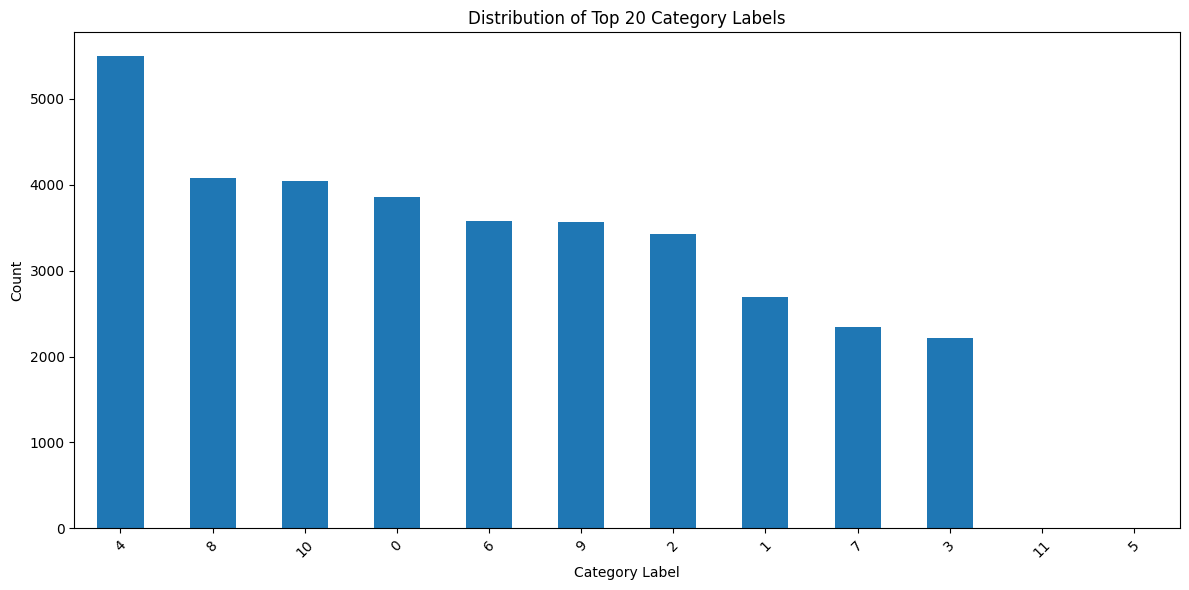


Descriptive statistics for class counts:
count      12.000000
mean     2942.583333
std      1628.725461
min         1.000000
25%      2309.500000
50%      3493.000000
75%      3907.500000
max      5501.000000
Name: Category Label, dtype: float64


In [7]:
# Analyze class distribution in the original dataset
class_distribution = df['Category Label'].value_counts()

# Basic statistics
print("Statistics for Category Labels:")
print("-" * 30)
print(f"Number of unique classes: {len(class_distribution)}")
print(f"Most common class: {class_distribution.index[0]} (count: {class_distribution.iloc[0]})")
print(f"Least common class: {class_distribution.index[-1]} (count: {class_distribution.iloc[-1]})")
print("\nClass distribution (top 10):")
print(class_distribution.head(10))

# Plot class distribution
plt.figure(figsize=(12, 6))
class_distribution.head(20).plot(kind='bar')
plt.title('Distribution of Top 20 Category Labels')
plt.xlabel('Category Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Additional statistics
print("\nDescriptive statistics for class counts:")
print(class_distribution.describe())

Shape after removing categories 11 and 5: (35308, 2)

Updated class distribution:
4     5501
8     4081
10    4044
0     3862
6     3583
9     3562
2     3424
1     2697
7     2342
3     2212
Name: Category Label, dtype: int64


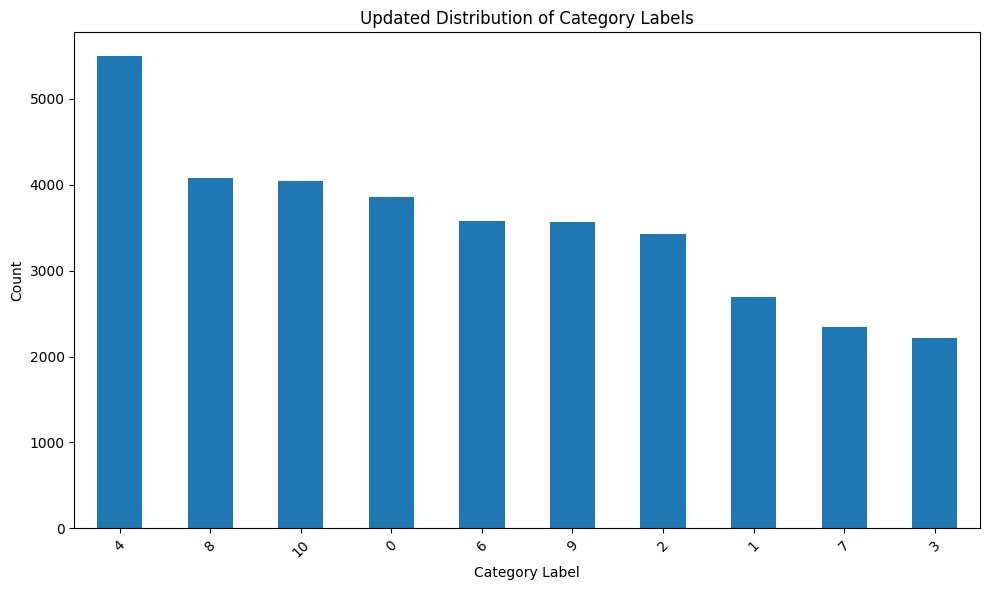

In [8]:
# Filter out categories 11 and 5 from the dataset
df = df[~df['Category Label'].isin([11, 5])]
print("Shape after removing categories 11 and 5:", df.shape)

# Update class distribution
class_distribution = df['Category Label'].value_counts()
print("\nUpdated class distribution:")
print(class_distribution)

# Visualize updated distribution
plt.figure(figsize=(10, 6))
class_distribution.plot(kind='bar')
plt.title('Updated Distribution of Category Labels')
plt.xlabel('Category Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Epoch 1/20
773/773 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 4.9839e-04 - loss: 9.3645 - val_accuracy: 0.0013 - val_loss: 9.1983
Epoch 2/20
773/773 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.0015 - loss: 8.6452 - val_accuracy: 0.0019 - val_loss: 9.3394
Epoch 3/20
773/773 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.0035 - loss: 8.3118 - val_accuracy: 0.0026 - val_loss: 9.5205
Epoch 4/20
773/773 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.0042 - loss: 8.1130 - val_accuracy: 0.0032 - val_loss: 9.6031
Epoch 5/20
773/773 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.0059 - loss: 7.9307 - val_accuracy: 0.0038 - val_loss: 9.6496
Epoch 6/20
773/773 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.0046 - loss: 7.7648 - val_accuracy: 0.0030 - val_loss: 9.6996
Epoch 7/20
773/773 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.0050 - loss: 7.6248 - val_accuracy: 0.0049 - val_loss: 9.7377
Epoch 8/20
773/773 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.0046 - loss: 7.5138 - val_accuracy

Traceback (most recent call last):
  File "/Users/juan/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py", line 3442, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/3s/rvyp8s9s4yd_7bw__tmcrlch0000gn/T/ipykernel_98837/763461529.py", line 50, in <module>
    disp.plot()
  File "/Users/juan/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_plot/confusion_matrix.py", line 173, in plot
  File "/Users/juan/Library/Python/3.9/lib/python/site-packages/matplotlib/axes/_axes.py", line 689, in text
    t = mtext.Text(x, y, text=s, **effective_kwargs)
  File "/Users/juan/Library/Python/3.9/lib/python/site-packages/matplotlib/_api/deprecation.py", line 454, in wrapper
    return func(*args, **kwargs)
  File "/Users/juan/Library/Python/3.9/lib/python/site-packages/matplotlib/text.py", line 165, in __init__
    super().__init__()
  File "/Users/juan/Library/Python/3.9/lib/python/site-packages/matplotlib/artist.py", line 201

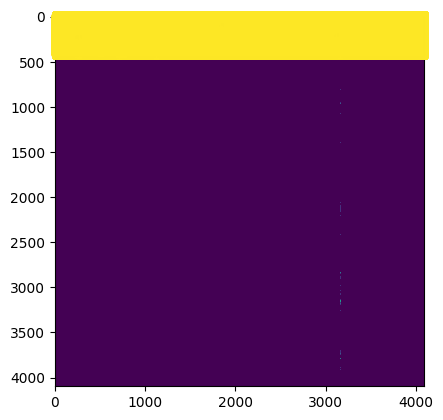

In [9]:
# 5. Codificamos las variables objetivo primero
le_cluster = LabelEncoder()
y = le_cluster.fit_transform(y)

# Dividimos los datos manteniendo la proporción de clases
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, shuffle=True)

# 4. Escalamos las variables numéricas
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

# 6. One-Hot Encoding de la variable objetivo
num_classes = len(valid_classes)
y_train = keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes=num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes=num_classes)

# Modelo inicial

model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))  # Capa oculta con 64 neuronas y activación ReLU
model.add(Dense(num_classes , activation='softmax')) # Capa de salida con activación softmax para clasificación multiclase

# Compilación del modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenamiento
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

# Guardamos el modelo
model.save('Apellido ApellidoNombreinicial.keras')

# Evaluación
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Loss en test: {loss:.4f}')
print(f'Accuracy en test: {accuracy:.4f}')

#Predicciones para matriz de confusión
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Matriz de confusión
cm = confusion_matrix(y_test_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


print(classification_report(y_test_classes, y_pred_classes))


# Visualización del entrenamiento
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Modelo más complejo con dropout para evitar overfitting
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.3),  # Previene overfitting
    Dense(96, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(y_train.shape[1], activation='softmax')
])

# Optimizador con learning rate personalizado
optimizer = Adam(learning_rate=0.001)

# Compilación
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

# Early stopping para detener el entrenamiento si no mejora
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Entrenamiento
history1 = model.fit(
    X_train, y_train,
    epochs=50,  # Más epochs pero con early stopping
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)

In [ ]:
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization, Activation
from tensorflow.keras.callbacks import LearningRateScheduler

# Modelo con batch normalization
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, kernel_regularizer=l2(0.01)),  # L2 regularization
    BatchNormalization(),
    Activation('relu'),
    Dense(96),
    BatchNormalization(),
    Activation('relu'),
    Dense(y_train.shape[1], activation='softmax')
])

# Learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return (lr * tf.math.exp(-0.1)).numpy()

lr_scheduler = LearningRateScheduler(scheduler)

# Compilación
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.002),
    metrics=['accuracy']
)

# Entrenamiento
history2 = model.fit(
    X_train, y_train,
    epochs=40,
    batch_size=64,  # Batch size más grande
    validation_data=(X_val, y_val),
    callbacks=[lr_scheduler]
)

In [ ]:
# Función para evaluar y comparar modelos
def evaluate_model(model, name):
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)
    
    print(f"\nResultados del modelo {name}:")
    print(f"Loss en test: {loss:.4f}")
    print(f"Accuracy en test: {accuracy:.4f}")
    print("\nReporte de clasificación:")
    print(classification_report(y_test_classes, y_pred_classes))

# Evaluar cada modelo
model1 = keras.models.load_model('Apellido ApellidoNombreinicial.keras')  # Load the first model
evaluate_model(model1, "inicial")
evaluate_model(model, "alternativa 1 (with batch normalization)")
evaluate_model(model, "alternativa 2 (with L2 regularization and batch normalization)")